### TASK

The task at hand involves constructing a predictive model that leverages various features associated with
a customer’s initial order. The objective is to determine whether a €5.00 voucher should be issued to a
specific customer. The model should be designed to predict if a customer will place a follow-up purchase
within a 90-day period following their initial purchase. This information is represented by the target90
variable in the dataset. Each customer who is predicted to not place a subsequent order will be send a
voucher.




Empirical analyses by the media retailer have shown that for 25% of the churning customers, the voucher
triggers a purchase with an average order value of €10. So if a voucher is sent to a customer who would
not actually have bought again, revenue increases by an average of €1.25. Conversely, sending a voucher
to a customer who would have placed an order anyway results in a revenue loss equivalent to the voucher
value of €5. For customers who don’t receive a voucher, there is no impact on revenues.






The model’s performance is evaluated based on the expected revenue across all customers in a given
dataset. This is computed by considering the model’s predictions in conjunction with the associated costs
and revenues. It’s crucial to note that the model’s effectiveness is directly tied to its ability to maximize
this expected revenue. Hence, the model should be optimized with this specific goal in mind.
The dataset for training is provided in the train.csv file. Detailed descriptions of the features can be
found in the data dictionary.pdf file.

summarytools missingno klib sweetviz

In [2]:
import os
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: c:\Users\inven\OneDrive\Escritorio\Python_datos\Project Jorge Mortiz


In [3]:
import pandas as pd
df = pd.read_csv('./data/train.csv',sep=';')
df.head(5)

C:\Users\inven\AppData\Local\Temp\ipykernel_19448\3712128402.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/train.csv',sep=';')


,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
0,41191,2008-12-01,0,0,9,2008-12-01,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,38860,2008-12-16,1,0,4,2008-12-16,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,61917,2008-08-19,0,0,12,2008-08-19,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40647,2008-06-16,1,0,8,2008-06-16,0,1,0,0,...,0,0,0,2,0,0,0,0,0,0
4,1347,2008-08-08,0,0,1,2008-08-08,0,1,1,1,...,2,0,0,0,0,0,0,0,0,0


In [21]:
df.dtypes

customernumber           int64
date                    object
salutation               int64
title                    int64
domain                   int64
datecreated             object
newsletter               int64
model                    int64
paymenttype              int64
deliverytype             int64
invoicepostcode          int64
delivpostcode           object
voucher                  int64
advertisingdatacode     object
case                     int64
numberitems              int64
gift                     int64
entry                    int64
points                   int64
shippingcosts            int64
deliverydatepromised    object
deliverydatereal        object
weight                   int64
remi                     int64
cancel                   int64
used                     int64
w0                       int64
w1                       int64
w2                       int64
w3                       int64
w4                       int64
w5                       int64
w6      

Revisar si ahi algo en la fechas 

# Dividir entre train y test 

In [ ]:
X = df.drop.columns(subset='target90',axes=1)
y = df['target90']

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(df, test_size=0.20, random_state=1842,shuffle= True)


In [5]:
Train.shape

(25942, 38)

In [7]:
Test.shape

(6486, 38)

### saving in project 

In [10]:

from summarytools import dfSummary

first_summary = dfSummary(Train)

first_summary

c:\Users\inven\anaconda3\envs\master\Lib\site-packages\summarytools\summarytools.py:124: RuntimeWarning: invalid value encountered in scalar divide
  stats += f"<br>IQR (CV) : {x.quantile(0.75) - x.quantile(0.25):.1f} ({x.mean()/x.std():.1f})"


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,customernumber[int64],Mean (sd) : 33393.8 (19147.7)min < med < max:1.0 < 33566.5 < 66251.0IQR (CV) : 33213.0 (1.7),"25,942 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACcElEQVR4nO3YO28aQRSG4TNgW8Mlu+IS6GhSuluJhiZdyvzYtOlSgJSaIk0qGoSEFhDEKMslVSSnCGF37Kw/631a++yMxLsHy+58Phvw0lXKvgBwjZuyL4A/OedqZnYX8Iif5/P54anuk0fg3S/em1BfEOdcrdPpfIyiqFX0GavVauuc+2xm+wLjFTM7FTzat9vtD3EcN4oMbzab1Dn36W+xPmuoZW4H0c10F0VRazQaPcRxnDu0+Xz+ZjKZvB8MBt1qtZpr/ng83u52u3fNZvN7pVLJ8p6dZZk3s/vhcPi12+1u8syu12s/Ho9by+XyzsyKhRrwgQe9YWZB26HMs82Kb6bodDrdxnGc9nq9H3mH0zStee/rSZLs+/1+mmd2Npu1ptPp2yRJvuWdfTRf995nRe5uZrVLP7wYashXUcgbZha2Hco8O2QzZVnmj8fj/X6//2JmRT5sMzNrNBr7vLGkaVorOvt4/rn8a6MW/ioKfcOeYDuUeXahzfT73ofDoZrvxq/fVX+jxnFc+A0NFbIdyjy7zHu/RvwfFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRJurvml9Xrt8z54u916M7PdbucXi0X9f86rnq1679D5a/r6BWUgPOMONcMcAAAAAElFTkSuQmCC"">",0(0.0%)
2,date[object],1. 2008-12-152. 2008-12-173. 2008-12-184. 2008-12-165. 2008-12-146. 2008-12-027. 2008-12-098. 2008-12-119. 2008-12-0810. 2008-12-1911. other,"250 (1.0%)230 (0.9%)204 (0.8%)204 (0.8%)185 (0.7%)183 (0.7%)178 (0.7%)169 (0.7%)169 (0.7%)167 (0.6%)24,003 (92.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADe0lEQVR4nO3cMU4bURhG0d/IQkkzlmWJxbAIFptFeDcIMUVANE4R0mMirhXnnCpFiimuxpOn92VzOp0GCjeXfgD+H2IjIzYyYiMjNjJiIyM2MmIjIzYym5n5PjNzOp1eLvwsXLnt4XB4mJnZbDY/BMdXulmWZb8sy35mbi/9MFw332xkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERma7ruvT+5/fLvokXD0bBDIb/2UWFW82MtZVZKyryDj6ICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxrVwMgYvZLzZyBi8kDF4IePog4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGdfCyRi8kPHNRsbPKBnrKjLWVWR8s5ERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuIuNaOBnrKjLebGQMXsgYvJBx9EFGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYxr4WQMXsh4s5ExeCFj8ELG0QcZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImODQMa6iow3GxnrKjLWVWQcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeNaOBmDFzLebGQMXsgYvJBx9EFGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYxr4WQMXsj4ZiPjZ5SMdRUZ6yoyvtnIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5FxLZyMdRUZbzYyBi9kDF7IOPogIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELGtXAyBi9k/rzZXAnnM97O+UXcHg6Hh/cNApxlXdenc4ZS22VZ9vf39y+73e71qx+O6/H8/PzteDzuHx8fb2fmY7HNzOx2u9e7u7ufX/p0XKPv5/xl52xkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxktjO/r4tc+kH4t3ymme26rk/H43E/Z14Xgfex1IeHUq6F8zfOuhZu8ELGPxDIiI2M2MiIjYzYyIiNjNjIiI2M2Mj8Ak9OECf6y4+3AAAAAElFTkSuQmCC"">",0(0.0%)
3,salutation[int64],Mean (sd) : 0.5 (0.7)min < med < max:0.0 < 0.0 < 2.0IQR (CV) : 1.0 (0.8),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABlUlEQVR4nO3cQYriUBSG0fcaEZ0kiOBiXEQvthfhbqR4DsqiQdOznhSUJiZ0/9Q54+QS5UN5grcOw1Dgf/fjXz8APGP16IJa67aUsp44//cwDNeJ98JfX4Zaa93u9/ufXdftpgy/XC5vtdZfYuVVjz5R113X7Y7H47Xv+48xg1trm9PptDufz+tSilB5ycOv/lJK6fv+43A4vE+Yv51wD3ziMEUEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEZ76cx/j2IUwP6HOzC6EZQh1fnYhLECoC7ELYV4OU0QQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEsGSNGaz5F5YoTKLpffCCpW5LLoXVqjMaqm9sA5TRBAqEYRKBKESQahEECoRhEqEp35Hba1txg5urW1ut9uqlNLVWkc/WLDufr+vvuF79tLrfnTNH4LcdwJrlhnvAAAAAElFTkSuQmCC"">",0(0.0%)
4,title[int64],Mean (sd) : 0.0 (0.1)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.1),2 distinct values,"<img sr

# desbalanceado 

In [15]:
from ydata_profiling import ProfileReport
profile = ProfileReport(Train, title="Profiling Reoder history Report")


In [24]:
#profile

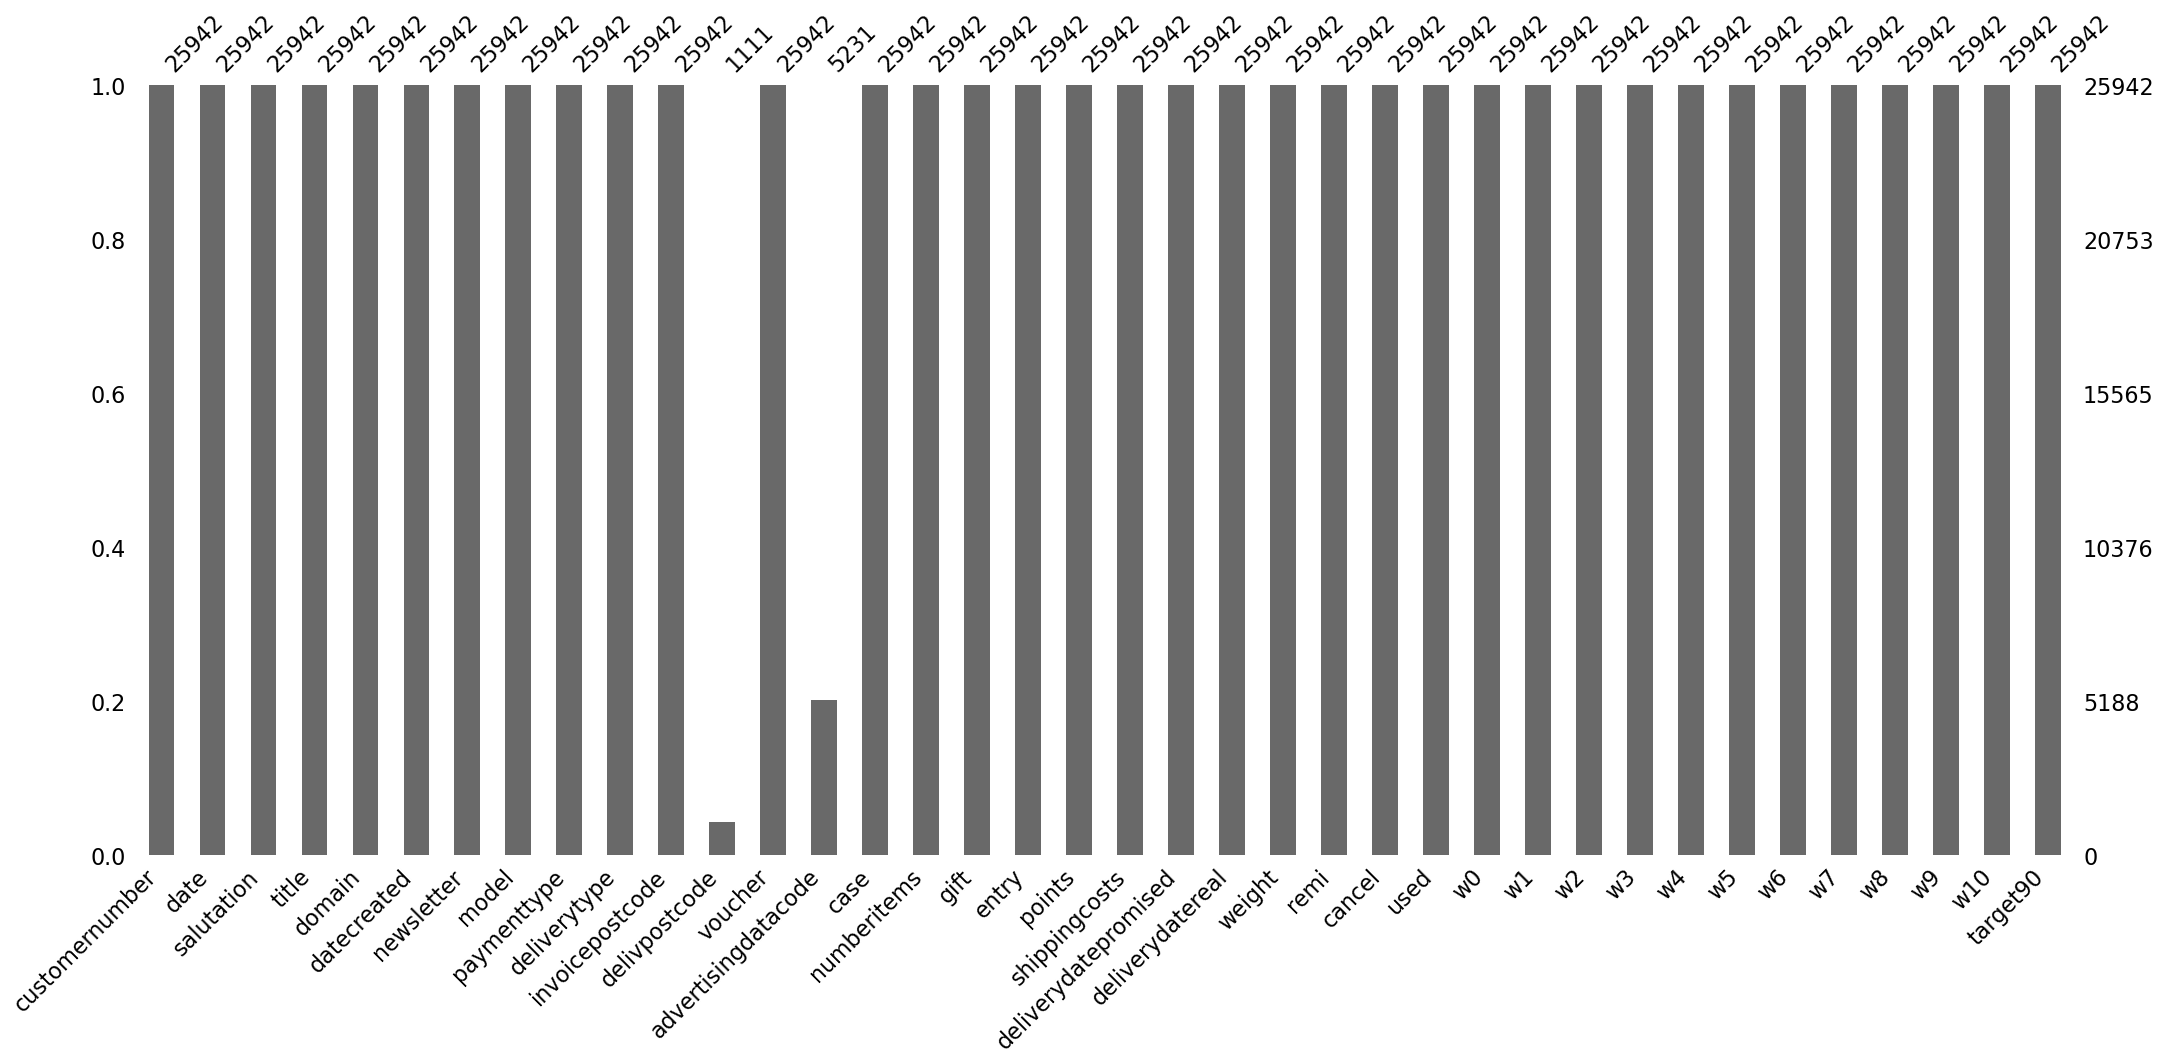

In [18]:
import missingno as msno

a= msno.bar(Train) 

In [26]:
# profile.to_file("figures/profile_report.html")


c:\Users\inven\anaconda3\envs\master\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\inven\anaconda3\envs\master\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: title={'center': 'Feature-correlation (pearson)'}>

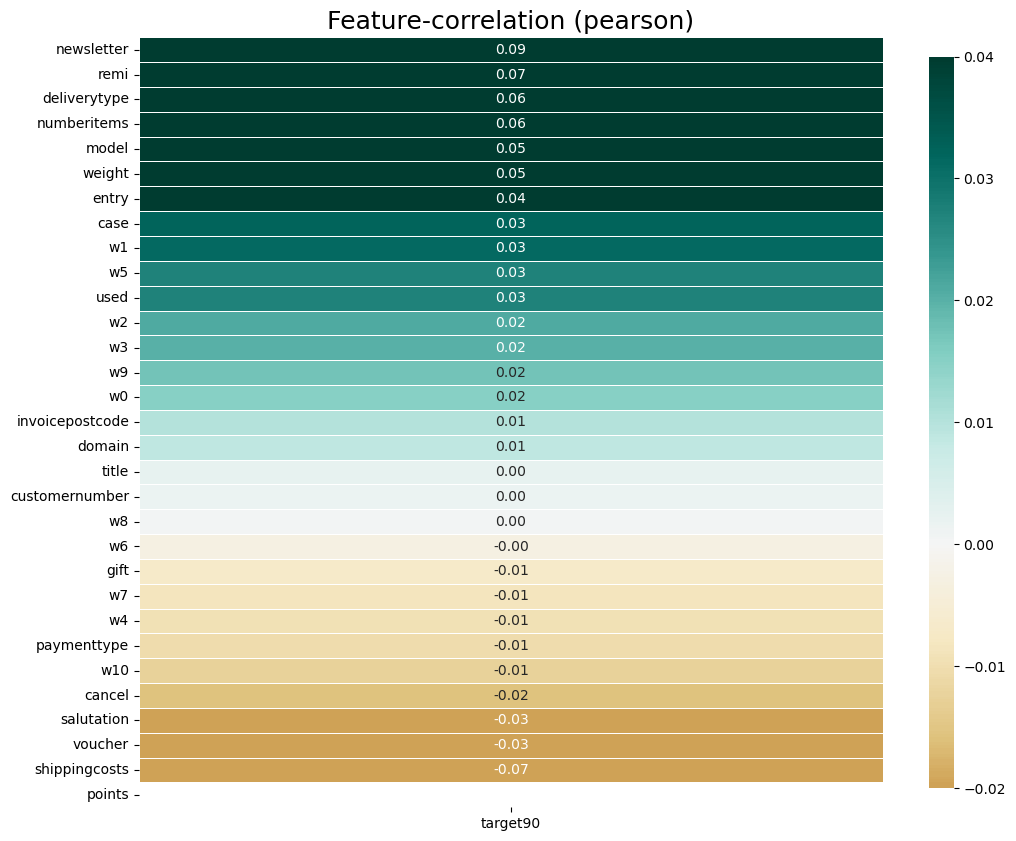

In [21]:
import klib
# Positive plot correlation
klib.corr_plot(Train,target='target90' ) 

<Axes: title={'center': 'Feature-correlation (pearson)'}>

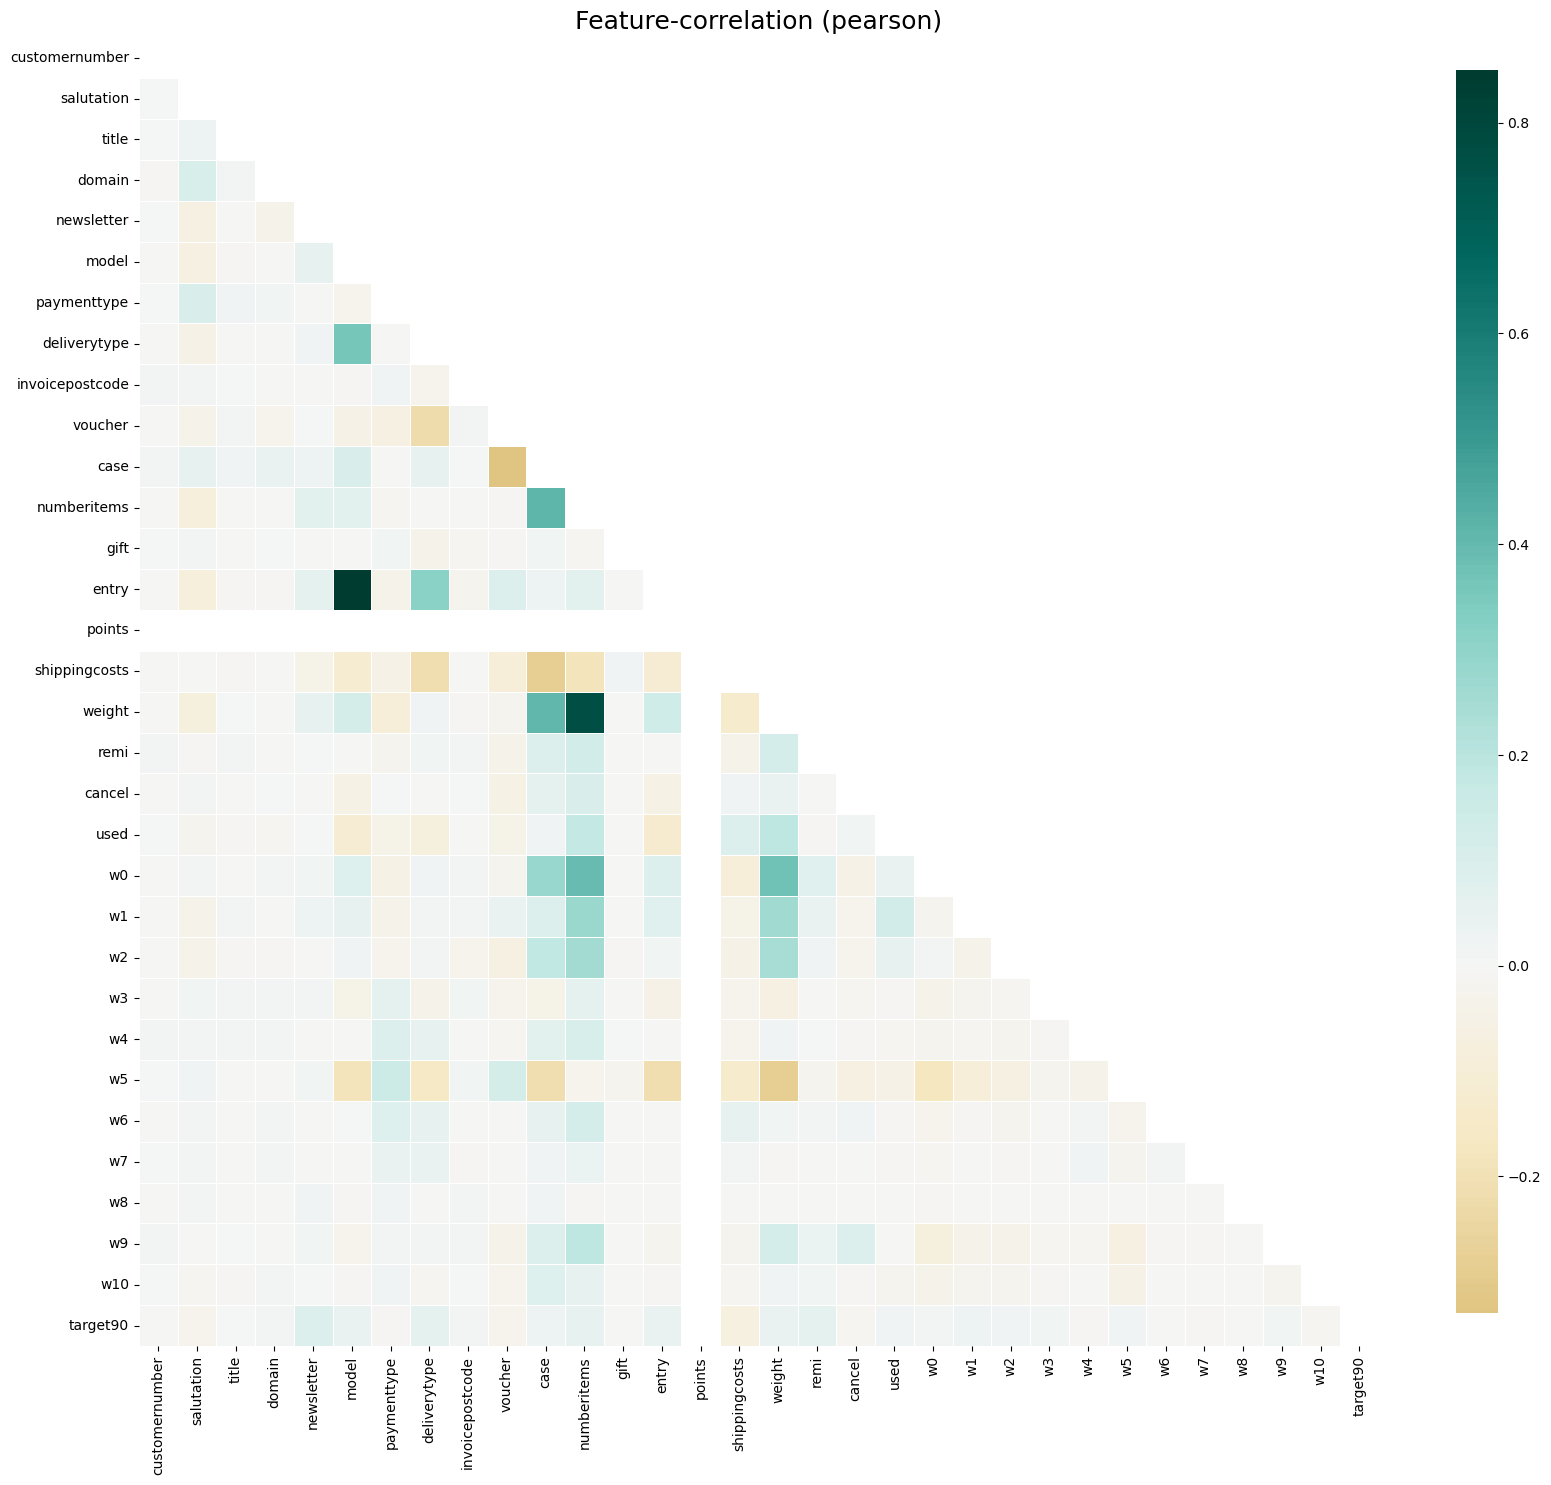

In [22]:
klib.corr_plot(Train, annot=False, figsize=(20, 17))

hace nuevas variables y aja ver que pasa 

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = Train.drop(['target90'], axis=1)

silhouette_scores = []  # To store silhouette scores for each k
range_n_clusters = list(range(2, 11))  # Cluster range to evaluate, starting from 2 since silhouette score requires at least 2 clusters

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.show()

# Identify the optimal number of clusters as the one with the highest silhouette score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_n_clusters}")


ValueError: could not convert string to float: '2008-07-29'

Segun el numero de cluster si tiene sentido ese division

In [35]:
from imblearn.over_sampling import SMOTE

# Crear el objeto de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE directamente al DataFrame
df2_resampled, _ = smote.fit_resample(df2, df2['target90'])


C:\Users\inven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\inven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  w

In [ ]:
df.target90.describe()

In [ ]:
df2_resampled.target90.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Preparar los datos de entrenamiento a partir de df2_resampled
X_train = df2.drop(columns=['target90'])
y_train = df2['target90']

# Estandarizar las características (opcional, pero recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Crear y entrenar el modelo XGBClassifier
classifier = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, n_jobs=-1, random_state=1374)
classifier.fit(X_train_scaled, y_train)

# Generar predicciones en el conjunto de entrenamiento
y_train_pred = classifier.predict(X_train_scaled)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_train_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.show()

# Calcular otras métricas
accuracy = accuracy_score(y_train, y_train_pred)
classification_rep = classification_report(y_train, y_train_pred, target_names=["Clase 0", "Clase 1"])

# Mostrar métricas
print("Métricas del Modelo - Conjunto de Entrenamiento")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print("\nReporte de Clasificación:")
print(classification_rep)

print("Modelo de clasificación entrenado y evaluado exitosamente.")


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Preparar los datos de entrenamiento a partir de df2_resampled
X_train = df2_resampled.drop(columns=['target90'])
y_train = df2_resampled['target90']

# Estandarizar las características (opcional, pero recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Crear y entrenar el modelo XGBClassifier
classifier = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, n_jobs=-1, random_state=1374)
classifier.fit(X_train_scaled, y_train)

# Generar predicciones en el conjunto de entrenamiento
y_train_pred = classifier.predict(X_train_scaled)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_train_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.show()

# Calcular otras métricas
accuracy = accuracy_score(y_train, y_train_pred)
classification_rep = classification_report(y_train, y_train_pred, target_names=["Clase 0", "Clase 1"])

# Mostrar métricas
print("Métricas del Modelo - Conjunto de Entrenamiento")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print("\nReporte de Clasificación:")
print(classification_rep)

print("Modelo de clasificación entrenado y evaluado exitosamente.")


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def objective(trial):
    # Definir el espacio de búsqueda de hiperparámetros
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1.0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'n_jobs': -1
    }
    
    # Crear el modelo con los hiperparámetros sugeridos
    model = XGBClassifier(**param, random_state=1374)
    
    # Evaluar el modelo utilizando validación cruzada
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    accuracy = scores.mean()
    
    return accuracy


In [ ]:
# Crear el estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)
